# LA Cell Optimization Using `act`: Stability Check

This notebook checks stability of ACT's estimates in different modes on the [[LA: Cell_A]](https://github.com/cyneuro/current-channel-library/tree/main/Alturki2016/4_LA) example from Alturki2016. The cell's true parameters are
- `glbar_leak = 5.5e-5`
- `gna = 0.000142`
- `gkdr = 0.0015`

In [1]:
# Default summary model
from act.feature_model import DefaultSummaryModel

# Default optimizers
from act.optim import NaiveLinearOptimizer, RandomSearchLinearOptimizer

# Default metrics
from act.metrics import correlation_score, plot_score

import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data Simulation Pipeline

Datafiles `orig/orig_cellA.csv` and `seg/seg_cellA.csv` were generated by compiling Original and Segregated modfiles respectively and running the code below (commented for safety) with respective modfiles.

In [2]:
# Data simulation pipeline for the segregated cell

# glbar_leak = 5.5e-5
# gna = 0.000142
# gkdr = 0.0015

# parameter_samples = np.array([glbar_leak, gna, gkdr])

# from act.optim import ACTOptimizer
# sim = ACTOptimizer("seg_config.json")
# data = sim.simulate(parameter_samples)
# np.savetxt("cell_A.csv", data.T, delimiter = ',')

In [3]:
# Load observed data for a original cell
orig_data = torch.tensor(pd.read_csv("orig/orig_cell_A.csv", header = None).to_numpy()).float()
orig_data = orig_data.T


# Load observed data for a segregated cell
seg_data = torch.tensor(pd.read_csv("seg/seg_cell_A.csv", header = None).to_numpy()).float()
seg_data = seg_data.T

print(f"Data shapes check: original = {orig_data.shape}, segregated = {seg_data.shape}")

Data shapes check: original = torch.Size([5, 4001]), segregated = torch.Size([5, 4001])


In [4]:
seeds = 123 + np.arange(10)
seeds

array([123, 124, 125, 126, 127, 128, 129, 130, 131, 132])

In [5]:
def plot_corrs_with_bounds(corr_pool):
    Is = [0.2, 0.3, 0.4, 0.5, 0.6]
    mean = np.mean(corr_pool, axis = 0)
    std = np.std(corr_pool, axis = 0)
    plt.plot(Is, mean, marker = 'o')
    plt.fill_between(Is, mean - 2 * std, mean + 2 * std, alpha = 0.4)
    plt.xlabel("CI")
    plt.ylabel("Correlation")
    plt.show()

## Naive Linear Optimizer

### 1. ACT Mode: Original, Data: Original

In [11]:
oo_naive_lin_opt_correlations = []

for seed in seeds:
    np.random.seed(seed)
    oo_naive_lin_opt = NaiveLinearOptimizer("orig/orig_config.json")
    oo_naive_lin_opt_estimates = oo_naive_lin_opt.optimize(observed_data = orig_data, num_epochs = 100, 
                                                        lr = 1e-6, return_loss_history = False)
    corr = correlation_score(oo_naive_lin_opt, orig_data, oo_naive_lin_opt_estimates[0])
    
    oo_naive_lin_opt_correlations.append(corr)

In [12]:
np.set_printoptions(suppress = True)
oo_naive_lin_opt_correlations = np.array(oo_naive_lin_opt_correlations)
oo_naive_lin_opt_correlations

array([[0.65897636, 0.65897636, 0.65897636, 0.65897636, 0.65897636],
       [0.79530769, 0.79530769, 0.79530769, 0.79530769, 0.79530769],
       [0.84168338, 0.84168338, 0.84168338, 0.84168338, 0.84168338],
       [0.88971441, 0.88971441, 0.88971441, 0.88971441, 0.88971441],
       [0.95716103, 0.95716103, 0.95716103, 0.95716103, 0.95716103],
       [0.86000898, 0.86000898, 0.86000898, 0.86000898, 0.86000898],
       [0.76205006, 0.76205006, 0.76205006, 0.76205006, 0.76205006],
       [0.85789981, 0.85789981, 0.85789981, 0.85789981, 0.85789981],
       [0.75185525, 0.75185525, 0.75185525, 0.75185525, 0.75185525],
       [0.97563361, 0.97563361, 0.97563361, 0.97563361, 0.97563361]])

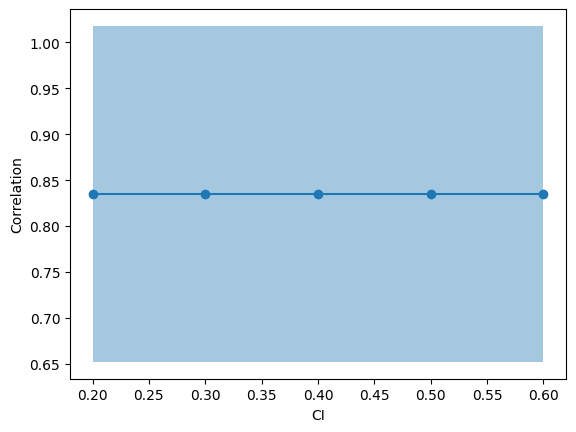

In [38]:
plot_corrs_with_bounds(oo_naive_lin_opt_correlations)

### 2. ACT Mode: Original, Data: Segregated

In [6]:
os_naive_lin_opt_correlations = []

for seed in seeds:
    np.random.seed(seed)

    os_naive_lin_opt = NaiveLinearOptimizer("seg/seg_config.json")
    os_naive_lin_opt_estimates = os_naive_lin_opt.optimize(observed_data = seg_data, num_epochs = 100, 
                                                        lr = 1e-6, return_loss_history = False)
    corr = correlation_score(os_naive_lin_opt, seg_data, os_naive_lin_opt_estimates[0])
    os_naive_lin_opt_correlations.append(corr)

In [7]:
np.set_printoptions(suppress = True)
os_naive_lin_opt_correlations

[array([0.98065042, 0.98065042, 0.98065042, 0.98065042, 0.98065042]),
 array([0.98413625, 0.98413625, 0.98413625, 0.98413625, 0.98413625]),
 array([0.83526231, 0.83526231, 0.83526231, 0.83526231, 0.83526231]),
 array([0.98337737, 0.98337737, 0.98337737, 0.98337737, 0.98337737]),
 array([0.99590687, 0.99590687, 0.99590687, 0.99590687, 0.99590687]),
 array([0.97906216, 0.97906216, 0.97906216, 0.97906216, 0.97906216]),
 array([0.99907174, 0.99907174, 0.99907174, 0.99907174, 0.99907174]),
 array([0.97232917, 0.97232917, 0.97232917, 0.97232917, 0.97232917]),
 array([0.97950574, 0.97950574, 0.97950574, 0.97950574, 0.97950574]),
 array([0.97469594, 0.97469594, 0.97469594, 0.97469594, 0.97469594])]

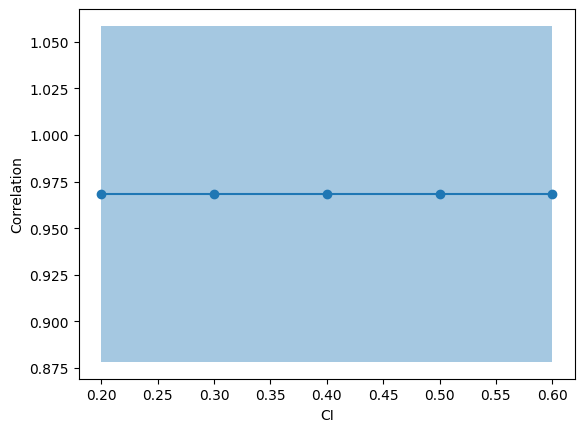

In [8]:
plot_corrs_with_bounds(os_naive_lin_opt_correlations)

### 3. ACT Mode: Segregated, Data: Segregated

In [9]:
ss_naive_lin_opt_corrs = []

for seed in seeds:
    np.random.seed(seed)
    ss_naive_lin_opt = NaiveLinearOptimizer("seg/seg_config.json")

    ss_naive_lin_opt_estimates_passive = ss_naive_lin_opt.optimize_with_segregation(observed_data = seg_data, num_epochs = 100, 
                                                                                    lr = 1e-6, return_loss_history = False,
                                                                                    parameter_inds = [0], region = "passive")
    ss_naive_lin_opt_estimates_spiking = ss_naive_lin_opt.optimize_with_segregation(observed_data = seg_data, num_epochs = 100, 
                                                                                lr = 1e-6, return_loss_history = False,
                                                                                parameter_inds = [1, 2], region = "spiking")
    ss_naive_lin_opt_estimates = np.hstack((ss_naive_lin_opt_estimates_passive, ss_naive_lin_opt_estimates_spiking))[0]
    
    corr = correlation_score(ss_naive_lin_opt, seg_data, ss_naive_lin_opt_estimates)
    ss_naive_lin_opt_corrs.append(corr)
    

In [10]:
ss_naive_lin_opt_corrs

[array([0.98688434, 0.98688434, 0.98688434, 0.98688434, 0.98688434]),
 array([0.98489579, 0.98489579, 0.98489579, 0.98489579, 0.98489579]),
 array([0.96513733, 0.96513733, 0.96513733, 0.96513733, 0.96513733]),
 array([0.96869942, 0.96869942, 0.96869942, 0.96869942, 0.96869942]),
 array([0.9431455, 0.9431455, 0.9431455, 0.9431455, 0.9431455]),
 array([0.90402982, 0.90402982, 0.90402982, 0.90402982, 0.90402982]),
 array([0.97677116, 0.97677116, 0.97677116, 0.97677116, 0.97677116]),
 array([0.89969668, 0.89969668, 0.89969668, 0.89969668, 0.89969668]),
 array([0.90414264, 0.90414264, 0.90414264, 0.90414264, 0.90414264]),
 array([0.83506101, 0.83506101, 0.83506101, 0.83506101, 0.83506101])]

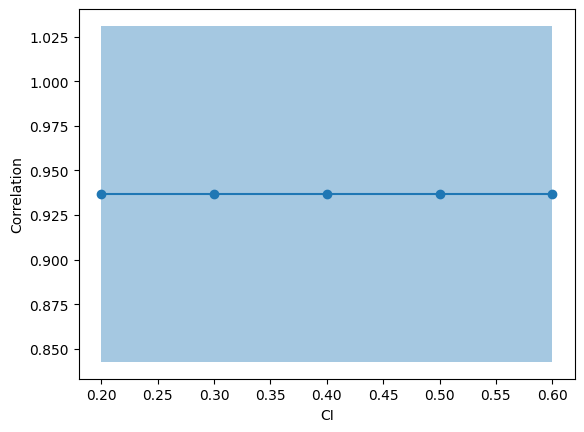

In [11]:
plot_corrs_with_bounds(ss_naive_lin_opt_corrs)

## Linear Optimizer

### 1. ACT mode: Original, Data: Original

In [39]:
oo_linopt_correlations = []

for seed in seeds:
    np.random.seed(seed)

    # Define the feature model
    oo_feature_model = DefaultSummaryModel(num_summary_features = 61, num_linear_layer_input_features = 250, use_statistics = True)

    # Define optimizer
    oo_linopt = RandomSearchLinearOptimizer(config_file = "orig/orig_config.json")

    # Optimize
    oo_linopt_estimates = oo_linopt.optimize(feature_model = oo_feature_model, observed_data = orig_data, num_summary_features = 64, 
                                             num_epochs = 800, num_prediction_rounds = 800, lr = 1e-5, return_loss_history = False)

    corr = correlation_score(oo_linopt, orig_data, oo_linopt_estimates)

    oo_linopt_correlations.append(corr)

Total number of summary features: 64


[W NNPACK.cpp:64] Could not initialize NNPACK! Reason: Unsupported hardware.


Total number of summary features: 64
Total number of summary features: 64
Total number of summary features: 64
Total number of summary features: 64
Total number of summary features: 64
Total number of summary features: 64
Total number of summary features: 64
Total number of summary features: 64
Total number of summary features: 64


In [40]:
np.set_printoptions(suppress = True)
oo_linopt_correlations

[array([0.80966957, 0.80966957, 0.80966957, 0.80966957, 0.80966957]),
 array([0.95429737, 0.95429737, 0.95429737, 0.95429737, 0.95429737]),
 array([0.99820572, 0.99820572, 0.99820572, 0.99820572, 0.99820572]),
 array([0.91037478, 0.91037478, 0.91037478, 0.91037478, 0.91037478]),
 array([0.9143116, 0.9143116, 0.9143116, 0.9143116, 0.9143116]),
 array([0.96471121, 0.96471121, 0.96471121, 0.96471121, 0.96471121]),
 array([0.83294857, 0.83294857, 0.83294857, 0.83294857, 0.83294857]),
 array([0.99936624, 0.99936624, 0.99936624, 0.99936624, 0.99936624]),
 array([0.89559395, 0.89559395, 0.89559395, 0.89559395, 0.89559395]),
 array([0.96766212, 0.96766212, 0.96766212, 0.96766212, 0.96766212])]

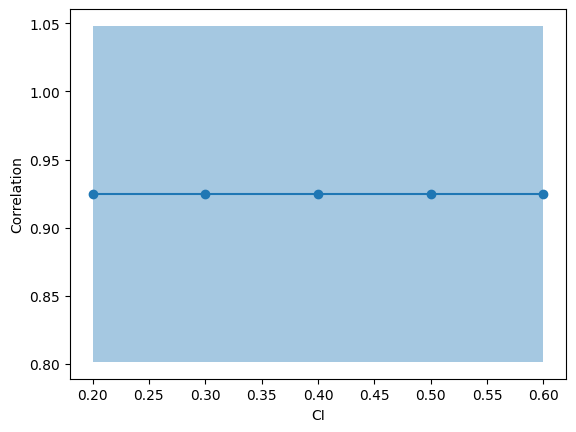

In [41]:
plot_corrs_with_bounds(oo_linopt_correlations)

### 2. ACT Mode: Original, Data: Segregated

In [12]:
os_linopt_correlations = []

for seed in seeds:
    np.random.seed(seed)

    # Define the feature model
    os_feature_model = DefaultSummaryModel(num_summary_features = 61, num_linear_layer_input_features = 250, use_statistics = True)

    # Define optimizer
    os_linopt = RandomSearchLinearOptimizer(config_file = "seg/seg_config.json")

    # Optimize
    os_linopt_estimates = os_linopt.optimize(feature_model = os_feature_model, observed_data = seg_data, num_summary_features = 64, 
                                             num_epochs = 800, num_prediction_rounds = 800, lr = 1e-5, return_loss_history = False)
    
    corr = correlation_score(os_linopt, seg_data, os_linopt_estimates)

    os_linopt_correlations.append(corr)

Total number of summary features: 64


[W NNPACK.cpp:64] Could not initialize NNPACK! Reason: Unsupported hardware.


Total number of summary features: 64
Total number of summary features: 64
Total number of summary features: 64
Total number of summary features: 64
Total number of summary features: 64
Total number of summary features: 64
Total number of summary features: 64
Total number of summary features: 64
Total number of summary features: 64


In [13]:
np.set_printoptions(suppress = True)
os_linopt_correlations

[array([0.99685425, 0.99685425, 0.99685425, 0.99685425, 0.99685425]),
 array([0.87826911, 0.87826911, 0.87826911, 0.87826911, 0.87826911]),
 array([0.88309288, 0.88309288, 0.88309288, 0.88309288, 0.88309288]),
 array([0.98918808, 0.98918808, 0.98918808, 0.98918808, 0.98918808]),
 array([0.90214386, 0.90214386, 0.90214386, 0.90214386, 0.90214386]),
 array([0.88324034, 0.88324034, 0.88324034, 0.88324034, 0.88324034]),
 array([0.99254277, 0.99254277, 0.99254277, 0.99254277, 0.99254277]),
 array([0.99143499, 0.99143499, 0.99143499, 0.99143499, 0.99143499]),
 array([0.89819532, 0.89819532, 0.89819532, 0.89819532, 0.89819532]),
 array([0.98890405, 0.98890405, 0.98890405, 0.98890405, 0.98890405])]

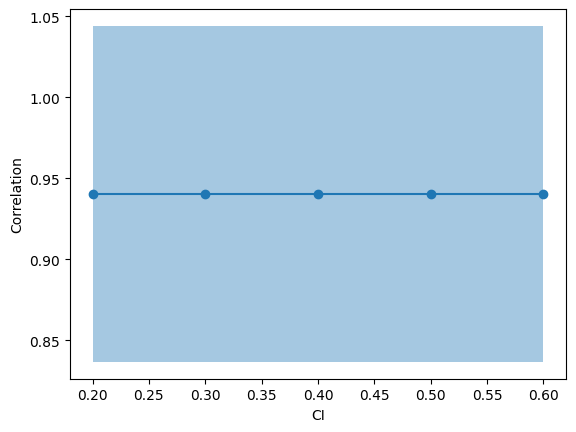

In [14]:
plot_corrs_with_bounds(os_linopt_correlations)

### 3. ACT Mode: Segregated, Data: Segregated

In [15]:
ss_linopt_correlations = []

for seed in seeds:
    np.random.seed(seed)

    # Define the feature model
    ss_feature_model = DefaultSummaryModel(num_summary_features = 61, num_linear_layer_input_features = 50, use_statistics = True)

    # Define optimizer
    ss_linopt = RandomSearchLinearOptimizer(config_file = "seg/seg_config.json")

    ss_linopt_estimates_passive = ss_linopt.optimize_with_segregation(feature_model = ss_feature_model, region = "passive", 
                                                                      parameter_inds = [0], observed_data = seg_data, num_summary_features = 64, 
                                                                      num_epochs = 800, num_prediction_rounds = 800, lr = 1e-5, 
                                                                      return_loss_history = False)
    # Redefine the feature model
    ss_feature_model = DefaultSummaryModel(num_summary_features = 61, num_linear_layer_input_features = 87, use_statistics = True)

    ss_linopt_estimates_spiking = ss_linopt.optimize_with_segregation(feature_model = ss_feature_model, region = "spiking", 
                                                                    parameter_inds = [1, 2], observed_data = seg_data, 
                                                                    num_summary_features = 64, 
                                                                    num_epochs = 800, num_prediction_rounds = 800, lr = 1e-5, 
                                                                    return_loss_history = False)
    
    ss_linopt_estimates = np.hstack((ss_linopt_estimates_passive, ss_linopt_estimates_spiking))
    corr = correlation_score(ss_linopt, seg_data, ss_linopt_estimates)

    ss_linopt_correlations.append(corr)


Total number of summary features: 64
Total number of summary features: 64
Total number of summary features: 64
Total number of summary features: 64
Total number of summary features: 64
Total number of summary features: 64
Total number of summary features: 64
Total number of summary features: 64
Total number of summary features: 64
Total number of summary features: 64
Total number of summary features: 64
Total number of summary features: 64
Total number of summary features: 64
Total number of summary features: 64
Total number of summary features: 64
Total number of summary features: 64
Total number of summary features: 64
Total number of summary features: 64
Total number of summary features: 64
Total number of summary features: 64


In [16]:
ss_linopt_correlations

[array([0.98788499, 0.98788499, 0.98788499, 0.98788499, 0.98788499]),
 array([0.9981002, 0.9981002, 0.9981002, 0.9981002, 0.9981002]),
 array([0.98902746, 0.98902746, 0.98902746, 0.98902746, 0.98902746]),
 array([0.98333094, 0.98333094, 0.98333094, 0.98333094, 0.98333094]),
 array([0.98911387, 0.98911387, 0.98911387, 0.98911387, 0.98911387]),
 array([0.89658458, 0.89658458, 0.89658458, 0.89658458, 0.89658458]),
 array([0.97697355, 0.97697355, 0.97697355, 0.97697355, 0.97697355]),
 array([0.98956913, 0.98956913, 0.98956913, 0.98956913, 0.98956913]),
 array([0.99721655, 0.99721655, 0.99721655, 0.99721655, 0.99721655]),
 array([0.99208794, 0.99208794, 0.99208794, 0.99208794, 0.99208794])]

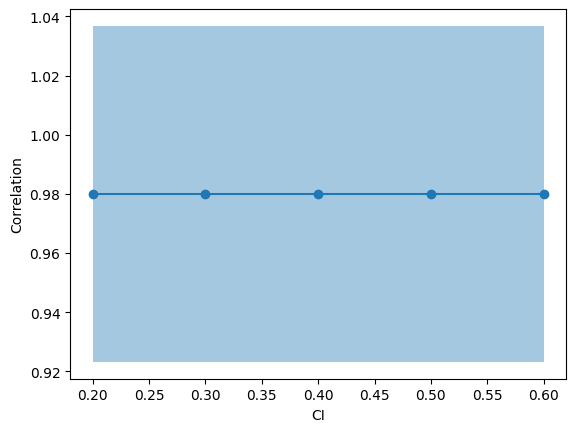

In [17]:
plot_corrs_with_bounds(ss_linopt_correlations)